In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [562]:
dfbri = df[df["Nombre_autor"]=="The Bridge"]

In [554]:
df = pd.read_csv("data/twitter.csv", index_col=0)
index_23 = df[df["Fecha"].str.contains("2022-05-23")].index
df.drop(index=index_23, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Id_tweet,Texto,Fecha,Id_autor,Nombre_autor,username_autor,N_Retweet,N_Reply,N_Like,N_Quote
0,1527312943397806080,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,2022-05-19 15:39:16+00:00,1162694149956603904,The Bridge,TheBridge_Tech,2,0,0,0
1,1526946552492789760,Esta es la historia de Isis🤗 que decidió hacer...,2022-05-18 15:23:22+00:00,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0
2,1526886949839065088,Gracias @victorianoI y equipo por el análisis ...,2022-05-18 11:26:31+00:00,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0
3,1526842834741039105,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,2022-05-18 08:31:13+00:00,1336771626306854912,Bcas,Bcasapp,4,1,8,0
4,1526576722350686208,¿Con ganas de probar si un empleo tecnológico ...,2022-05-17 14:53:47+00:00,1162694149956603904,The Bridge,TheBridge_Tech,2,0,2,0


In [578]:
df["Rep"] = df["N_Retweet"] + df["N_Like"]

In [586]:
df.sort_values(by="Rep", ascending=False).head(5)

,Id_tweet,Texto,Fecha,Id_autor,Nombre_autor,username_autor,N_Retweet,N_Reply,N_Like,N_Quote,Rep
19,1519706866703638529,En breve empezamos la charla sobre RV y Psicol...,2022-04-28 15:55:26+00:00,3294953441,Jose Maria Torralba,JM_Torralba_,1,0,15,0,16
57,1513848281801056258,"De los 21, hay 7 desarrolladoras de @Adalab_Di...",2022-04-12 11:55:30+00:00,1609031,Mánu Fosela,manufosela,3,3,12,0,15
88,1500124541137428490,Día para agradecer a @TheBridge_Tech y @Glovo_...,2022-03-05 15:02:16+00:00,363153431,Pablo Oliete,pablooliete,0,0,13,0,13
104,1494627201794428930,¿Aún no has solicitado tu beca para el #bootca...,2022-02-18 10:57:48+00:00,73355170,Indra,IndraCompany,5,0,8,0,13
3,1526842834741039105,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,2022-05-18 08:31:13+00:00,1336771626306854912,Bcas,Bcasapp,4,1,8,0,12


In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id_tweet        134 non-null    int64 
 1   Texto           134 non-null    object
 2   Fecha           134 non-null    object
 3   Id_autor        134 non-null    int64 
 4   Nombre_autor    134 non-null    object
 5   username_autor  134 non-null    object
 6   N_Retweet       134 non-null    int64 
 7   N_Reply         134 non-null    int64 
 8   N_Like          134 non-null    int64 
 9   N_Quote         134 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.6+ KB


In [79]:
df_user_tweet = df.groupby(["Nombre_autor","username_autor"]).count()[["Texto"]].sort_values(by="Texto", ascending=False).rename(columns = {'Texto':'N_Tweets'}).copy().reset_index()
df_user_tweet.head(20)

,Nombre_autor,username_autor,N_Tweets
0,The Bridge,TheBridge_Tech,53
1,Mujeres a Seguir,MujeresaSeguir,7
2,Berta Otero,bertinha84,5
3,Indra,IndraCompany,3
4,Fundación Universia,FUniversia,3
5,@Poderyliderazgo.cl,Poder_Liderazgo,2
6,TheFringe/LABS,TheFringeLABS,2
7,Pep Iberico,soyelsimo,2
8,Mario Lopez de Avila,nodosenlared,2
9,Jose Maria Torralba,JM_Torralba_,2


In [80]:
df_user_tweet["Usuario"]  =df_user_tweet["Nombre_autor"] + " (" + df_user_tweet["username_autor"]+ ")"


In [262]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

c:\Users\jamf1\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.



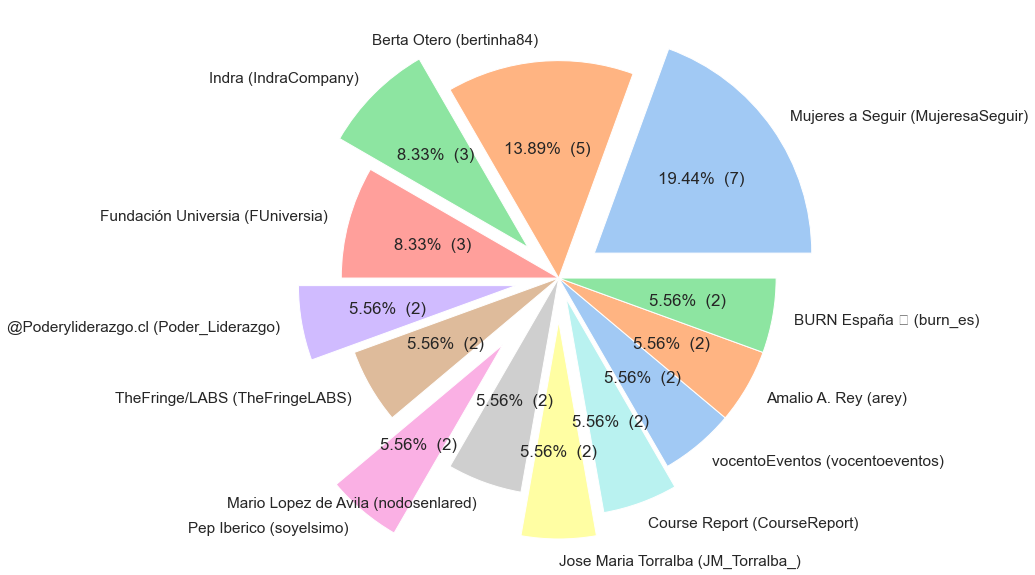

In [280]:
plt.figure(figsize=(10, 10))
sns.set(font_scale =1.4)
pie_tweets = df_user_tweet[df_user_tweet["N_Tweets"]>1]
colors = sns.color_palette('pastel')[0:13]
pie_tweets = pie_tweets[pie_tweets["Usuario"]!="The Bridge (TheBridge_Tech)"]
myexplode = [0.2, 0, 0.2, 0, 0.2, 0, 0.4, 0,0.2, 0.1, 0, 0, 0]
plt.pie(pie_tweets["N_Tweets"], labels = pie_tweets["Usuario"].values, explode=myexplode, colors=colors, autopct=make_autopct(pie_tweets["N_Tweets"].values));

c:\Users\jamf1\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.



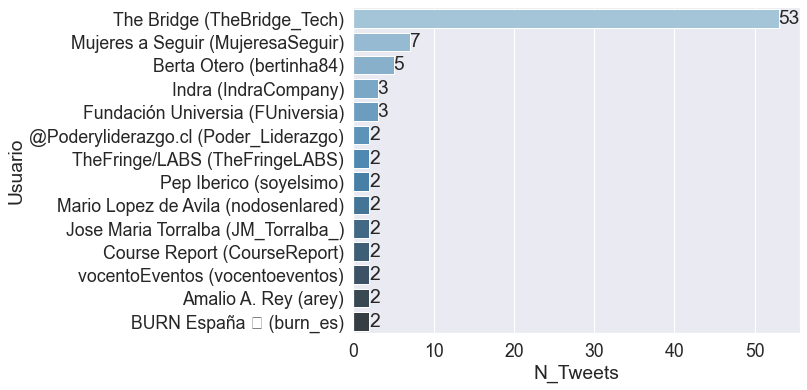

In [81]:
plt.figure(figsize=(8,6))
sns.set(font_scale =1.6)
ax =sns.barplot(x="N_Tweets", y="Usuario", data=df_user_tweet[df_user_tweet["N_Tweets"]>1], palette="Blues_d")
ax.bar_label(ax.containers[0]);

In [113]:
df_fechas = df.copy()
df_fechas[['Fecha','Hora']] = df_fechas["Fecha"].str.split(" ", expand=True)
df_fechas[['Año', 'Mes', 'Dia']] = df_fechas['Fecha'].str.split('-', expand=True)
df_fechas['Dia'] = df_fechas['Dia'].astype(int)
df_fechas['Mes'] = df_fechas['Mes'].astype(int)
df_fechas['Año'] = df_fechas['Año'].astype(int)
df_fechas['Fecha'] = pd.to_datetime(df_fechas["Fecha"])
df_fechas.head()

,Id_tweet,Texto,Fecha,Id_autor,Nombre_autor,username_autor,N_Retweet,N_Reply,N_Like,N_Quote,Hora,Año,Mes,Dia
0,1527312943397806080,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,2022-05-19,1162694149956603904,The Bridge,TheBridge_Tech,2,0,0,0,15:39:16+00:00,2022,5,19
1,1526946552492789760,Esta es la historia de Isis🤗 que decidió hacer...,2022-05-18,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0,15:23:22+00:00,2022,5,18
2,1526886949839065088,Gracias @victorianoI y equipo por el análisis ...,2022-05-18,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0,11:26:31+00:00,2022,5,18
3,1526842834741039105,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,2022-05-18,1336771626306854912,Bcas,Bcasapp,4,1,8,0,08:31:13+00:00,2022,5,18
4,1526576722350686208,¿Con ganas de probar si un empleo tecnológico ...,2022-05-17,1162694149956603904,The Bridge,TheBridge_Tech,2,0,2,0,14:53:47+00:00,2022,5,17


In [114]:
df_fechas["bridge"] = np.where(df_fechas["Nombre_autor"]=="The Bridge", "The Bridge", "OTRO")

In [115]:
df_fechas = df_fechas.groupby(["Mes", "bridge"]).count()["Id_tweet"].reset_index().rename(columns={"Id_tweet":"N_tweet"})
df_fechas

,Mes,bridge,N_tweet
0,1,OTRO,11
1,1,The Bridge,6
2,2,OTRO,14
3,2,The Bridge,9
4,3,OTRO,13
5,3,The Bridge,14
6,4,OTRO,36
7,4,The Bridge,13
8,5,OTRO,7
9,5,The Bridge,11


In [117]:
df_fechas[df_fechas["bridge"]=="The Bridge"]

,Mes,bridge,N_tweet
1,1,The Bridge,6
3,2,The Bridge,9
5,3,The Bridge,14
7,4,The Bridge,13
9,5,The Bridge,11


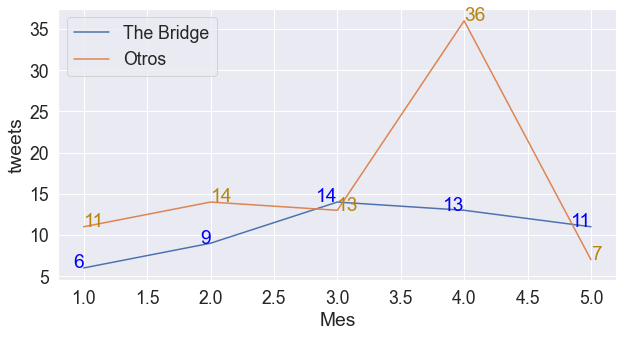

In [148]:
plt.figure(figsize=(10,5))
plt.plot("Mes", "N_tweet", data=df_fechas[df_fechas["bridge"]=="The Bridge"], label="The Bridge")
plt.plot("Mes", "N_tweet", data=df_fechas[df_fechas["bridge"]!="The Bridge"], label="Otros")
for i in range(5):
    plt.text(i+1,df_fechas[df_fechas["bridge"]=="The Bridge"]["N_tweet"].values[i],'{}'.format(df_fechas[df_fechas["bridge"]=="The Bridge"]["N_tweet"].values[i]), color="blue", horizontalalignment='right')
    plt.text(i+1,df_fechas[df_fechas["bridge"]!="The Bridge"]["N_tweet"].values[i],'{}'.format(df_fechas[df_fechas["bridge"]!="The Bridge"]["N_tweet"].values[i]), color="darkgoldenrod")
plt.legend(loc="upper left")
plt.xlabel("Mes")
plt.ylabel("tweets");

In [149]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

In [150]:
def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

In [538]:
df_text = df.copy()

In [539]:
import re
enlaces = re.compile(r"http\S+")
signos = re.compile("(@TheBridge_Tech)|(ready)|(\%)|(\⬇)|(\;)|(\:)|(\/)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\#)|(\”)|(\➡)|(\⤵)|(\▪)|(\ª)|(\▶)|(\')|(\.)|(\_)|(\’)")
theb = re.compile("(thebridgetech)")
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\🥵"
        u"\🤗"
        u"\🧑"
        u"\🤩"
        u"\🤸"
        u"\🤯"
        u"\✅"
        u"\⚽"
        u"\🤓"
        u"\🤔"
        u"\⚔"
        u"\❤️"
        u"\🧡"
        u"\🧵"
        u"\🦸‍♂🦸‍♀"
        
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def signs_texts(text):
    text = enlaces.sub("", text)
    text = emoji_pattern.sub('', text)
    return signos.sub('', text.lower())

def thebridge(text):    
    return theb.sub('', text.lower())


df_text['Texto'] = df_text['Texto'].apply(signs_texts)
df_text['Texto'] = df_text['Texto'].apply(thebridge)
df_text['Texto'].head()

0    qué poco queda para el próximo burn monday lun...
1    esta es la historia de isis que decidió hacer ...
2    gracias victorianoi y equipo por el análisis c...
3    cómo combatir el paro juvenil tipdeldia en un ...
4    con ganas de probar si un empleo tecnológico e...
Name: Texto, dtype: object

In [540]:
df_text['Texto'] = df_text['Texto'].apply(remove_stopwords)
df_text.head()

,Id_tweet,Texto,Fecha,Id_autor,Nombre_autor,username_autor,N_Retweet,N_Reply,N_Like,N_Quote,Rep
0,1527312943397806080,queda próximo burn monday lunes mayo h aplicar...,2022-05-19 15:39:16+00:00,1162694149956603904,The Bridge,TheBridge_Tech,2,0,0,0,2
1,1526946552492789760,historia isis decidió hacer cambio vida profes...,2022-05-18 15:23:22+00:00,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0,0
2,1526886949839065088,gracias victorianoi equipo análisis graphext d...,2022-05-18 11:26:31+00:00,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0,0
3,1526842834741039105,cómo combatir paro juvenil tipdeldia país tasa...,2022-05-18 08:31:13+00:00,1336771626306854912,Bcas,Bcasapp,4,1,8,0,12
4,1526576722350686208,ganas probar si empleo tecnológico ven tallere...,2022-05-17 14:53:47+00:00,1162694149956603904,The Bridge,TheBridge_Tech,2,0,2,0,4


In [543]:
array_letra_nobridge[array_letra_nobridge["index"]>3]["palabra"].values

array(['bootcamp', 'becas', 'digital', 'junto', 'globant', 'web',
       'mujerytecnología', 'discapacidad', 'stem', 'madrid', 'desarrollo',
       'personas', 'full-stack', 'hoy', 'da', 'futuro', 'gracias',
       'indracompany', 'the', 'si', 'talento', 'realización',
       'formaciones', 'adalabdigital', 'dirigidas', 'bertinha',
       'bootcamps', 'data', 'curso', 'alumnos', 'enlace', 'formación',
       'puedes', 'mujeres', 'funiversia', 'día', 'aquí', 'aún',
       'otorgamos', 'mano', 'to'], dtype=object)

In [542]:
array_letra_bridge = []
for i in df_text[df_text['Nombre_autor']=="The Bridge"]["Texto"]:
    for j in i.split(" "):
        array_letra_bridge.append(j)
array_letra_bridge = pd.DataFrame(array_letra_bridge, columns=["palabra"]).reset_index().groupby("palabra").count().reset_index().sort_values(by="index", ascending=False)

array_letra_nobridge = []
for i in df_text[df_text['Nombre_autor']!="The Bridge"]["Texto"]:
    for j in i.split(" "):
        array_letra_nobridge.append(j)
array_letra_nobridge = pd.DataFrame(array_letra_nobridge, columns=["palabra"]).reset_index().groupby("palabra").count().reset_index().sort_values(by="index", ascending=False)

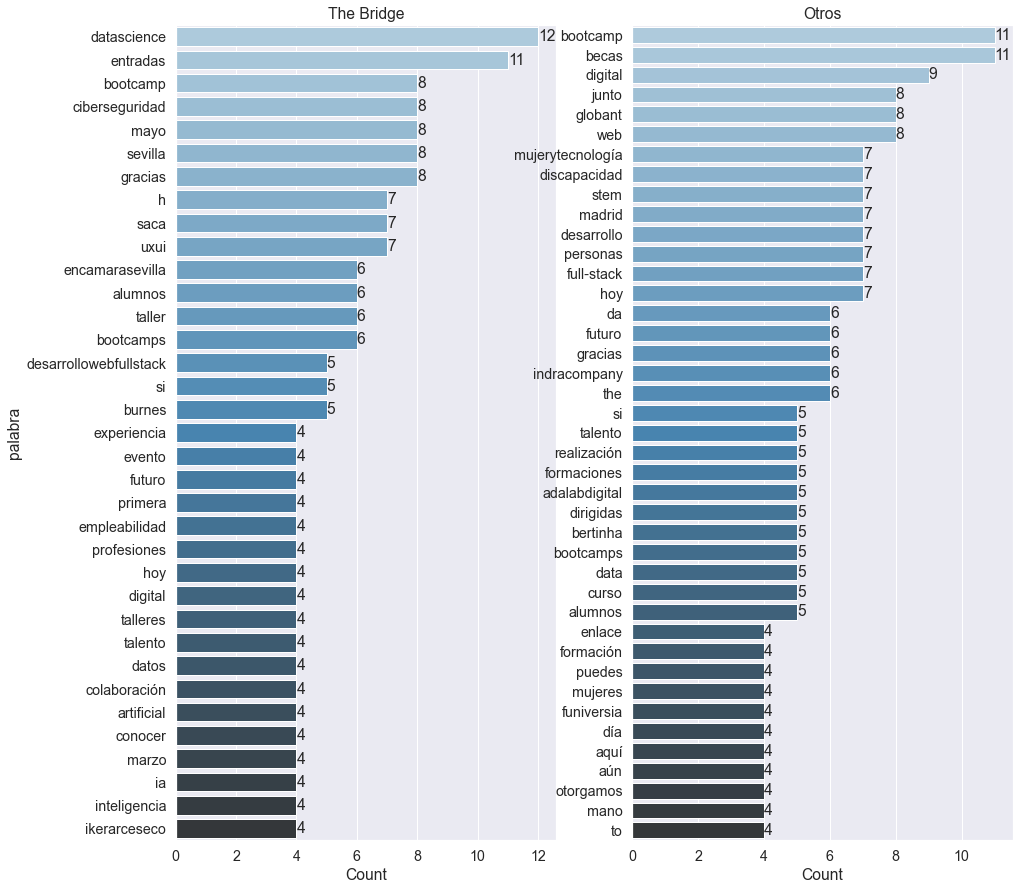

In [544]:
sns.set(font_scale =1.3)
fig, axes = plt.subplots(1, 2, figsize=(15,15))
ax =sns.barplot(x="index", y="palabra", data=array_letra_bridge[array_letra_bridge["index"]>3] , palette="Blues_d", ax=axes[0])
ax.bar_label(ax.containers[0])
ax.title.set_text('The Bridge')
ax.set_xlabel("Count")

ax1 =sns.barplot(x="index", y="palabra", data=array_letra_nobridge[array_letra_nobridge["index"]>3] , palette="Blues_d", ax=axes[1])
ax1.bar_label(ax1.containers[0])
ax1.title.set_text('Otros')
ax1.set_ylabel("")
ax1.set_xlabel("Count");

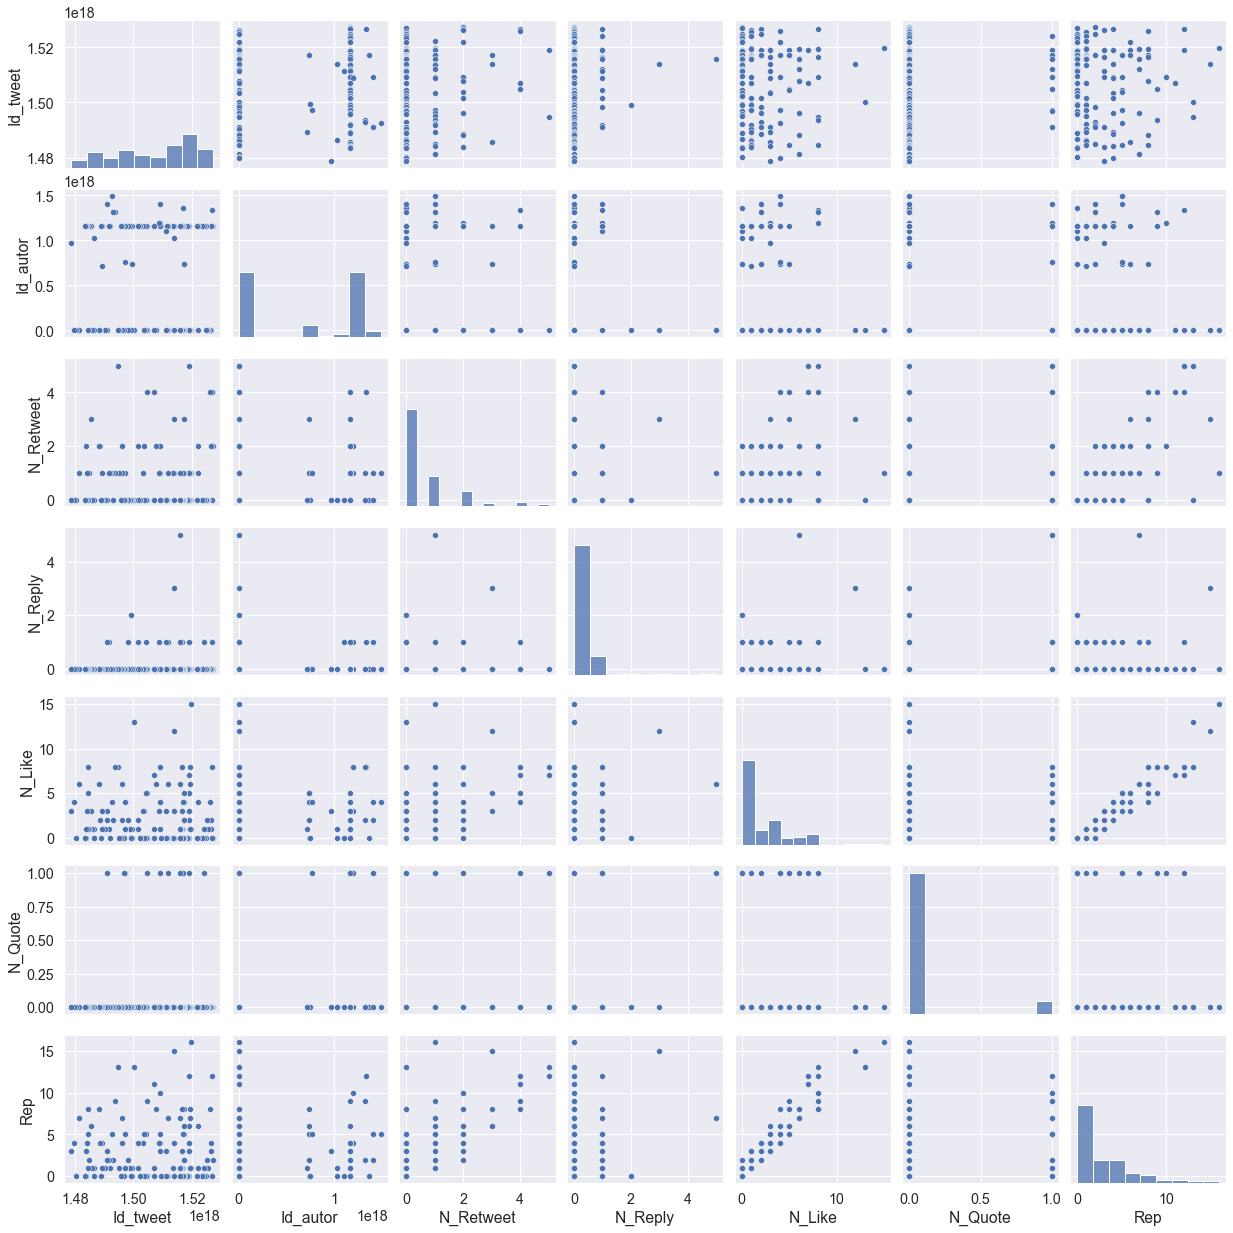

In [518]:
sns.pairplot(df);

#### MODELO

In [482]:
loaded_model = pickle.load(open('data/finished_model.model', 'rb'))

In [553]:
df_text.sort_values(by="Rep", ascending=False).head(3)

,Id_tweet,Texto,Fecha,Id_autor,Nombre_autor,username_autor,N_Retweet,N_Reply,N_Like,N_Quote,Rep
19,1519706866703638529,breve empezamos charla rv psicología,2022-04-28 15:55:26+00:00,3294953441,Jose Maria Torralba,JM_Torralba_,1,0,15,0,16
57,1513848281801056258,desarrolladoras adalabdigital geeksacademyes c...,2022-04-12 11:55:30+00:00,1609031,Mánu Fosela,manufosela,3,3,12,0,15
88,1500124541137428490,día agradecer glovoes oportunidad dado dos cra...,2022-03-05 15:02:16+00:00,363153431,Pablo Oliete,pablooliete,0,0,13,0,13


In [545]:
df_model = df_text.sort_values(by="Rep", ascending=False).head(3)[["Texto"]]
df_model

,Texto
19,breve empezamos charla rv psicología
57,desarrolladoras adalabdigital geeksacademyes c...
88,día agradecer glovoes oportunidad dado dos cra...


In [546]:
loaded_model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [547]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

In [548]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

In [549]:
# Nos cargamos stopwords
df_model['Texto'] = df_model['Texto'].apply(remove_stopwords)

# Aplicamos el Stemmer
df_model['Texto'] = df_model['Texto'].apply(spanish_stemmer)

In [550]:
df_model['Texto'].values[0]

'brev empez charl rv psicolog'

In [551]:
list_pred = []
for k in df_model["Texto"].values:
    predictions = loaded_model.predict(pd.Series(k))
    list_pred.append(predictions[0])
df_model['Prediccion'] = list_pred
df_model

,Texto,Prediccion
19,brev empez charl rv psicolog,0
57,desarroll adalabdigital geeksacademy codenotch...,0
88,dia agradec glov oportun dad dos cracks form c...,0


In [552]:
list_pred_probP = []
list_pred_probN = []
for k in df_model["Texto"].values:
    predictions = loaded_model.predict_proba(pd.Series(k))
    list_pred_probP.append(predictions[0][0])
    list_pred_probN.append(predictions[0][1])
df_model['Probabilidad_Pos'] = list_pred_probP
df_model['Probabilidas_Neg'] = list_pred_probN
df_model

,Texto,Prediccion,Probabilidad_Pos,Probabilidas_Neg
19,brev empez charl rv psicolog,0,0.849582,0.150418
57,desarroll adalabdigital geeksacademy codenotch...,0,0.547459,0.452541
88,dia agradec glov oportun dad dos cracks form c...,0,0.685852,0.314148
